# Descriptive Stats

In [101]:
import json
import os
import pandas as pd
import numpy as np
import os
import re
import math
import string
import requests
import json
from itertools import product
from inspect import getsourcefile
from io import oimport json
import os
import pandas as pd
import numpy as np
import os
import re
import math
import string
import requests
import json
from itertools import product
from inspect import getsourcefile
from io import open

os.chdir('\\\\file/UsersM$/mwa150/Home/Desktop/Ele.candidates.senators')
pd.set_option('display.max_colwidth', -1)
All_df = pd.read_csv('politicians_vader.csv', encoding = 'utf-8')

# positive tweets vs negative tweets
All_df['valence'] = ''
All_df['valence'] = np.where(All_df['compound'] > 0, All_df['valence'], 'Negative')
All_df['valence'].replace('','Positive', inplace=True)

# emotional tweets vs non-emotional tweets
print(len(All_df))

All_df.loc[All_df['compound'].between(-0.15, 0.15, inclusive=True), 'emo_group'] = 0
# emo_df = All_df.loc[All_df.emo_group != 'non-emo']
All_df['emo_group'].fillna(1, inplace=True)

print(All_df.emo_group.value_counts())
print("---------------------------")
print(emo_df.valence.value_counts())pen

os.chdir('\\\\file/UsersM$/mwa150/Home/Desktop/Ele.candidates.senators')
pd.set_option('display.max_colwidth', -1)
All_df = pd.read_csv('politicians_vader.csv', encoding = 'utf-8')

# positive tweets vs negative tweets
All_df['valence'] = ''
All_df['valence'] = np.where(All_df['compound'] > 0, All_df['valence'], 'Negative')
All_df['valence'].replace('','Positive', inplace=True)

# emotional tweets vs non-emotional tweets
print(len(All_df))

All_df.loc[All_df['compound'].between(-0.15, 0.15, inclusive=True), 'emo_group'] = 0
# emo_df = All_df.loc[All_df.emo_group != 'non-emo']
All_df['emo_group'].fillna(1, inplace=True)

print(All_df.emo_group.value_counts())
print("---------------------------")
print(emo_df.valence.value_counts())

14554
1.0    11717
0.0    2837 
Name: emo_group, dtype: int64
---------------------------
Positive    8932
Negative    2785
Name: valence, dtype: int64


In [99]:
del All_df['full_text']
del All_df['clean_text']
All_df.to_csv('politicians_vader_R.csv')

# GAMs

In [102]:
import json
import os
import pandas as pd
import numpy as np
import os
import re
import math
import string
import requests
import json
from itertools import product
from inspect import getsourcefile
from io import open

os.chdir('\\\\file/UsersM$/mwa150/Home/Desktop/Ele.candidates.senators')
pd.set_option('display.max_colwidth', -1)
All_df = pd.read_csv('politicians_vader.csv', encoding = 'utf-8')

# All_df.loc[All_df['compound'].between(-0.15, 0.15, inclusive=True), 'group'] = "non-emo"
# All_df = All_df.loc[All_df.group != 'non-emo']
All_df = All_df[All_df['compound'] != 0]
All_df = All_df[All_df['retweet_count'] != 0]
del All_df['clean_text']
del All_df['full_text']

All_df['valence'] = ''
All_df['valence'] = np.where(All_df['compound'] > 0, All_df['valence'], 'Negative')
All_df['valence'].replace('','Positive', inplace=True)

print(All_df.describe().round())

f1 = All_df.loc[All_df['followers_count'] < 10000]
f2 = All_df.loc[All_df['followers_count'].between(10000, 300000, inclusive=True)]
f3 = All_df.loc[All_df['followers_count'].between(300000, 500000, inclusive=False)]
f4 = All_df.loc[All_df['followers_count'].between(500000, 1000000, inclusive=False)]
f5 = All_df.loc[All_df['followers_count'].between(1000000, 3000000, inclusive=False)]
f6 = All_df.loc[All_df['followers_count'].between(3000000, 5000000, inclusive=False)]
f7 = All_df.loc[All_df['followers_count'].between(5000000, 10000000, inclusive=False)]
f8 = All_df.loc[All_df.followers_count >= 10000000]

f1.to_csv('f1.csv')
f2.to_csv('f2.csv')
f3.to_csv('f3.csv')
f4.to_csv('f4.csv')
f5.to_csv('f5.csv')
f6.to_csv('f6.csv')
f7.to_csv('f7.csv')
f8.to_csv('f8.csv')

       Unnamed: 0  Unnamed: 0.1  retweet_count  favorite_count  \
count  12361.0     12361.0       12361.0        12361.0          
mean   7739.0      190.0         1555.0         5867.0           
std    4677.0      175.0         5779.0         24579.0          
min    0.0         0.0           1.0            0.0              
25%    3701.0      62.0          34.0           84.0             
50%    7661.0      137.0         115.0          277.0            
75%    11933.0     263.0         484.0          1466.0           
max    15806.0     1001.0        191384.0       858777.0         

       followers_count  listed_count  compound      neg      neu      pos  
count  12361.0          12361.0       12361.0   12361.0  12361.0  12361.0  
mean   3284707.0        7880.0        0.0       0.0      1.0      0.0      
std    11544636.0       20684.0       1.0       0.0      0.0      0.0      
min    38.0             0.0          -1.0       0.0      0.0      0.0      
25%    16652.0          2

# Text Cleaning

In [48]:
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import word_tokenize
import re
from bs4 import BeautifulSoup

import os
import pandas as pd
os.chdir('C:\\Users\\yaffy\\Desktop\\python')
pd.set_option('display.max_colwidth', -1)
All_df = pd.read_csv('politicians_vader.csv')

All_df.full_text[46]

'It was gooood to join @JCRCMINNDAK this week at the Humphrey Institute to honor my friend and mentor Vice President Walter Mondale for his important and historic work on the Camp David negotiations forty years ago. ???@larryrjacobs??? ???@SteveHunegs??? https://t.co/dZDLVjP9Xn '

In [49]:
test_text = All_df['full_text'][46]
test_text2_decoding = test_text.decode("utf8").encode('ascii','ignore')

import HTMLParser
html_parser = HTMLParser.HTMLParser()
no_html = html_parser.unescape(test_text2_decoding)
print(no_html)
print("--------------------------------------------------------------------")

no_urls = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+','',no_html)
print(no_urls)
print("--------------------------------------------------------------------")

no_atmention = re.sub(r'@[\w_]+','', no_urls)
print(no_atmention)

spell_corrected = re.sub(r'(.)\1+', r'\1\1', no_atmention)
print("--------------------------------------------------------------------")
print(spell_corrected)

It was gooood to join @JCRCMINNDAK this week at the Humphrey Institute to honor my friend and mentor Vice President Walter Mondale for his important and historic work on the Camp David negotiations forty years ago. ???@larryrjacobs??? ???@SteveHunegs??? https://t.co/dZDLVjP9Xn 
--------------------------------------------------------------------
It was gooood to join @JCRCMINNDAK this week at the Humphrey Institute to honor my friend and mentor Vice President Walter Mondale for his important and historic work on the Camp David negotiations forty years ago. ???@larryrjacobs??? ???@SteveHunegs???  
--------------------------------------------------------------------
It was gooood to join  this week at the Humphrey Institute to honor my friend and mentor Vice President Walter Mondale for his important and historic work on the Camp David negotiations forty years ago. ?????? ??????  
--------------------------------------------------------------------
It was good to join  this week at the H

## Heatmap 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018122F9E898>]],
      dtype=object)

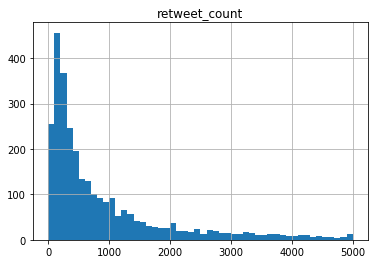

In [279]:
frames = [f5, f6, f7, f8]
df = pd.concat(frames)
df.loc[df['compound'] <-0.1].describe()

df.hist(column='retweet_count', bins=50, range=(0, 5000))

In [103]:
df = pd.read_csv('heatmap_followers_1m.csv')

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heatmap_followers_1m.csv')
flights = df.pivot("followers_group", "intensity_group", "retweet_count")
f, ax = plt.subplots(figsize=(9, 6), dpi=100)
sns.heatmap(flights, 
            annot=True, fmt='g',
            annot_kws={"size": 8},
            linewidths=0.5, ax=ax, cmap="YlGn", 
            cbar_kws={'label': 'Retweet Count', "shrink": 1.0})
ax.set_ylabel('')    
ax.set_xlabel('')
plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor", size = 8.5)
plt.setp(ax.get_yticklabels(), rotation=30, ha="right", rotation_mode="anchor", size = 8.5)
plt.savefig('heatmap_followers_1m.png')

In [104]:
df = pd.read_csv('heatmap_followers_10000.csv')

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heatmap_followers_10000.csv')
flights = df.pivot("followers_group", "intensity_group", "retweet_count")
f, ax = plt.subplots(figsize=(9, 6), dpi=100)
sns.heatmap(flights, 
            annot=True, fmt='g',
            annot_kws={"size": 8},
            linewidths=0.5, ax=ax, cmap="YlGn", 
            cbar_kws={'label': 'Retweet Count', "shrink": 1.0})
ax.set_ylabel('')    
ax.set_xlabel('')
plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor", size = 8.5)
plt.setp(ax.get_yticklabels(), rotation=30, ha="right", rotation_mode="anchor", size = 8.5)
plt.savefig('heatmap_followers_10000.png')

# WordCloud

In [76]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

neg_df = All_df[nAll_df.valence == 'Negative']
pos_df = All_df[nAll_df.valence == 'Positive']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mwa150\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


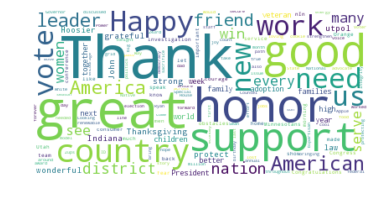

In [61]:
pos_tex = str(pos_df['clean_text'])

stopwords.update(["https", "amp", "http", "co"])

wordcloud3 = WordCloud(stopwords=stopwords, background_color="white", max_font_size=70).generate(pos_tex)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

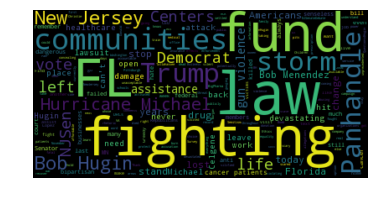

In [79]:
neg_tex = str(neg_df['clean_text'])

stopwords.update(["https", "amp", "http", "co", "get"])

wordcloud3 = WordCloud(stopwords=stopwords, background_color="black", max_font_size=70).generate(neg_tex)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()